In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

origin_image shape (987, 683, 3)


Text(0.5,1,'origin image')

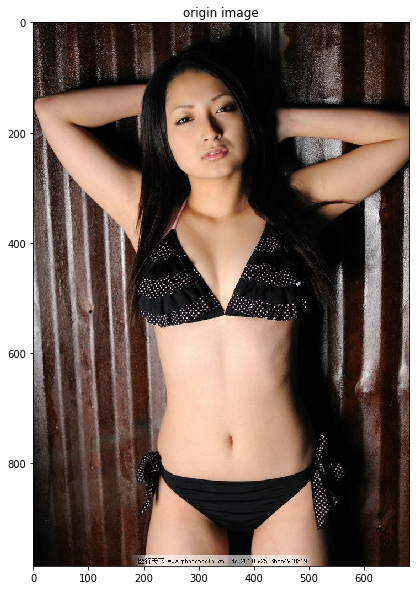

In [2]:
origin_image = cv2.imread('images/color_image.jpg')
# opencv以BGR模式加载彩色图片，而matplotlib以RGB模式显示，需转换
origin_image = cv2.cvtColor(origin_image, cv2.COLOR_BGR2RGB)
#grayImage = cv2.cvtColor(origin_image,cv2.COLOR_BGR2GRAY) #灰度变换 
print('origin_image shape',origin_image.shape)
#显示图像
plt.figure(figsize=(20,10))
plt.imshow(origin_image)
plt.title("origin image")

In [3]:
# 添加椒盐噪声的函数
# srcImage 源图片
# 加噪百分比
# return noiseImg 加完椒盐噪声的图片
def SaltAndPepperNoise(srcImage,percentage):
    noiseImg = srcImage
    #print(noiseImg[0,0])
    #noiseImg[0,0] = 0
    #print(noiseImg[0,0])
    noiseNum = int(percentage * srcImage.shape[0] * srcImage.shape[1])
    print('noiseNum %s' % (noiseNum))
    for i in range (noiseNum):
        randX=np.random.randint(0,srcImage.shape[0]) 
        randY=np.random.randint(0,srcImage.shape[1]) 
        randInt = np.random.randint(0,2)
#         print('randInt',randInt)
        if randInt == 0:
            noiseImg[randX,randY] = 0
        else:
            noiseImg[randX,randY] = 255
    return noiseImg

noiseNum 20223


Text(0.5,1,'saltAndPepper Noise image')

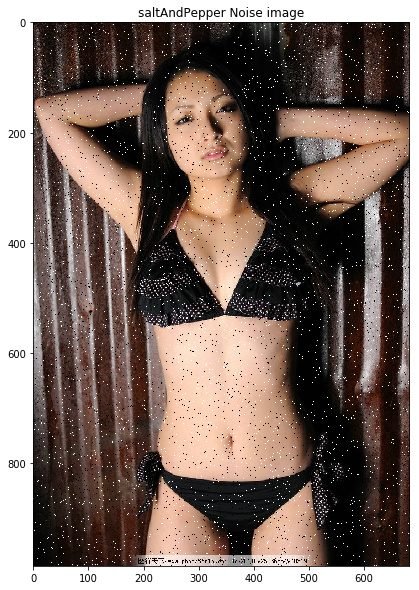

In [4]:
saltAndPepperImage = SaltAndPepperNoise(origin_image, 0.03)
plt.figure(figsize=(20,10))
# plt.subplot(2, 3, 2)
plt.imshow(saltAndPepperImage)
plt.title("saltAndPepper Noise image")

In [5]:
def GaussianNoise(srcImage,percentage):
    noiseImg = srcImage
    noiseNum = int(percentage * srcImage.shape[0] * srcImage.shape[1])
    print('noiseNum %s' % (noiseNum))
    for i in range (noiseNum):
        randX=np.random.randint(0,srcImage.shape[0]) 
        randY=np.random.randint(0,srcImage.shape[1]) 
        noiseImg[randX,randY] = 255
    return noiseImg

noiseNum 20223


Text(0.5,1,'Gaussian noise image')

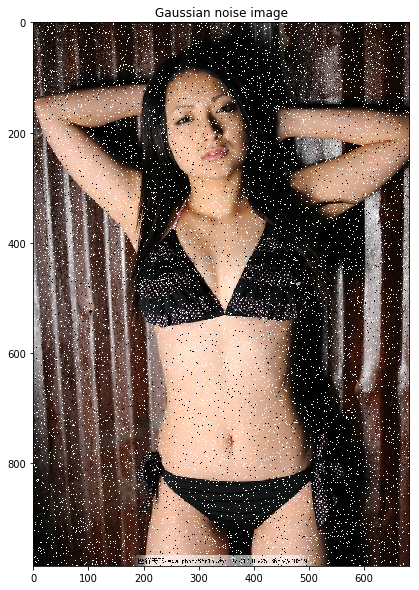

In [6]:
gaussianImage = GaussianNoise(origin_image, 0.03)
plt.figure(figsize=(20,10))
# plt.subplot(2, 3, 2)
plt.imshow(gaussianImage)
plt.title("Gaussian noise image")

In [7]:
meanFilter = np.array([[1,1,1],
                        [1,1,1],
                        [1,1,1]])
count = meanFilter.shape[1] * meanFilter.shape[1]
print(count)

9


In [8]:
#r,g,b = cv2.split(saltAndPepperImage)

In [79]:
def handleImageByFilter(image,filter):
    count = filter.shape[1] * filter.shape[1]
    rows,cols = image.shape[0],image.shape[1]
    print('rows= %s, cols=%s'%(rows,cols))
    imageArray = np.zeros( (rows-2,cols-2,3), dtype=np.int16 )
    for i in range(rows-2):
        rowArray = np.zeros( (1,cols - 2) )
        for j in range(cols-2):
            a_slice = image[i:i+3,j:j+3,:] 
            s = np.multiply(a_slice,filter) 
            s = np.sum(s,axis=1)
            s = np.sum(s,axis=0)
            s =  np.multiply(s,1/count)
            r,g,b=np.int(s[0]),np.int(s[1]),np.int(s[2])  
            imageArray[i][j] = [r,g,b]
    print(imageArray.shape)
    return imageArray
    
    

rows= 987, cols=683
(985, 681, 3)


Text(0.5,1,'handled gaussian image')

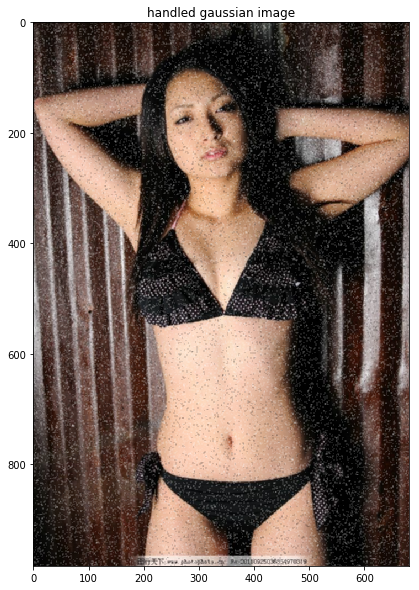

In [81]:
handledImage = handleImageByFilter(gaussianImage,meanFilter)
plt.figure(figsize=(20,10))
# plt.subplot(2, 3, 2)
plt.imshow(handledImage)
plt.title("handled gaussian image")

In [11]:
def zero_pad(X,pad):
    X_paded = np.pad(X,( (0,0), #样本数，不填充 
                        (pad,pad), #图像高度,你可以视为上面填充x个，下面填充y个(x,y) 
                        (pad,pad), #图像宽度,你可以视为左边填充x个，右边填充y个(x,y) 
                        (0,0)), #通道数，不填充 
                     'constant', constant_values=0) #连续一样的值填充 
    return X_paded


In [12]:
a = np.array([[[1,2,3],[1,2,3],[2,3,4]],[[1,0,2],[2,1,2],[2,1,1]],[[1,4,2],[2,4,2],[2,6,1]]])
print(a)

[[[1 2 3]
  [1 2 3]
  [2 3 4]]

 [[1 0 2]
  [2 1 2]
  [2 1 1]]

 [[1 4 2]
  [2 4 2]
  [2 6 1]]]


In [13]:
a.sum(axis=0)

array([[ 3,  6,  7],
       [ 5,  7,  7],
       [ 6, 10,  6]])

In [14]:
a.sum(axis=1)

array([[ 4,  7, 10],
       [ 5,  2,  5],
       [ 5, 14,  5]])

In [15]:
b=a.sum(axis=1)

In [16]:
b.sum(axis=0)

array([14, 23, 20])

In [76]:
np.ones( (3,4) )


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])